<a href="https://colab.research.google.com/github/Denis04-M/housing-price/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
import io
import pandas as pd

df2 = pd.read_csv(io.BytesIO(uploaded['housing.csv']))

In [ ]:
import pandas as pd

# reading housing csv data 
housing = pd.read_csv('housing.csv')

# viewing the first n data
housing.head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# seeing  how many districts belongs to each category of ocean_proximity object

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# seeing  how many districts belongs to each category of population

housing['population'].value_counts()

891.0     25
761.0     24
1227.0    24
1052.0    24
850.0     24
825.0     23
782.0     22
999.0     22
1005.0    22
753.0     21
781.0     21
1098.0    21
Name: population, dtype: int64

In [ ]:
#  summary of the numerical attributes

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


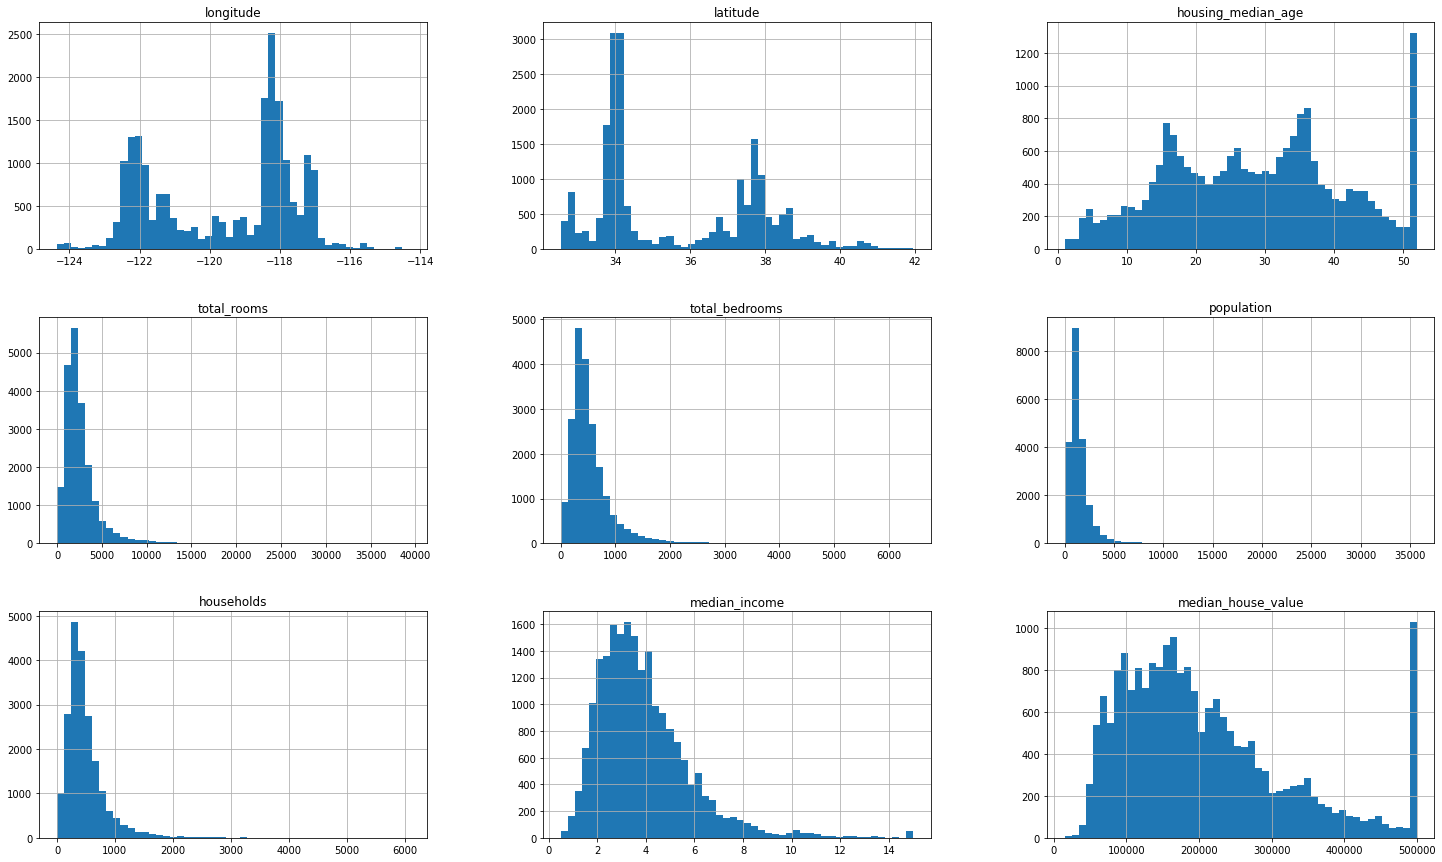

In [ ]:
# plotting histograms

import matplotlib.pyplot as plt

housing.hist(bins =50, figsize=(25,15))
plt.show()

In [ ]:
# # spliting the data to training set and testing set

# import numpy as np

# def split_train_test(data, test_ratio):
#   # keeping the data sets cosistent to avoid snooping
#   np.random.seed(20) # only works if the data does not change

#   shuffled_indices = np.random.permutation(len(data)) #permutation arrages the data in a perticular order
#   test_set_size = int(len(data)*test_ratio)
#   test_indices = shuffled_indices[: test_set_size]
#   train_indices = shuffled_indices[test_set_size :]
#   return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = split_train_test(housing, 0.2)
# print(len(train_set), 'train\n', len(test_set), 'test')

16512 train
 4128 test


In [ ]:
# using scikit-learn to split the data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 20)
print(len(train_set), 'train\n', len(test_set), 'test')

16512 train
 4128 test


In [ ]:
# stratified sampling based on the income category

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# creating an income category attribute
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [ ]:
for set in (strat_train_set, strat_test_set):
 set.drop(["income_cat"], axis=1, inplace=True)


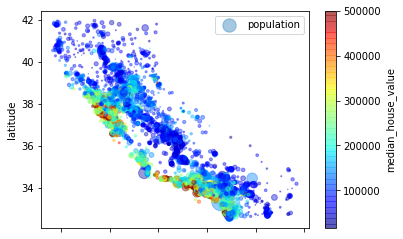

In [ ]:
# creating a copy of training set

housing = strat_train_set.copy()

# scatterplot of longitude and latitude 

housing.plot(kind='scatter', x = 'longitude', y = 'latitude', 
             alpha = 0.4, s = housing["population"]/100, label = 'population', c = 'median_house_value',
             cmap =plt.get_cmap('jet'), colorbar = True,)
plt.legend()

In [ ]:
# looking for correlation between various attributes

corr_matrix = housing.corr()

# corr median house value
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
# corr median income

corr_matrix['median_income'].sort_values(ascending = False)

median_income         1.000000
median_house_value    0.687151
total_rooms           0.200133
households            0.010869
population            0.002421
total_bedrooms       -0.009643
longitude            -0.019615
latitude             -0.075146
housing_median_age   -0.111315
Name: median_income, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0075fbd50>,
      dtype=object)

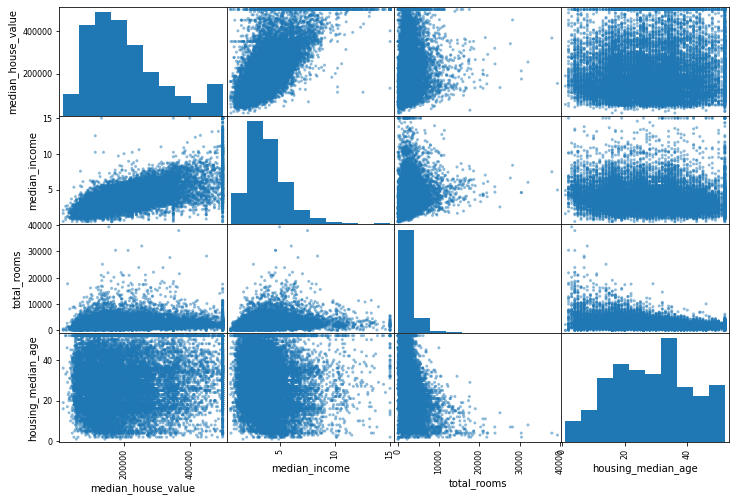

In [ ]:
# using pandas to check for correlations

from pandas.plotting import scatter_matrix

# selecting attributes to plot
attributes = ['median_house_value', 'median_income', 'total_rooms',
              'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

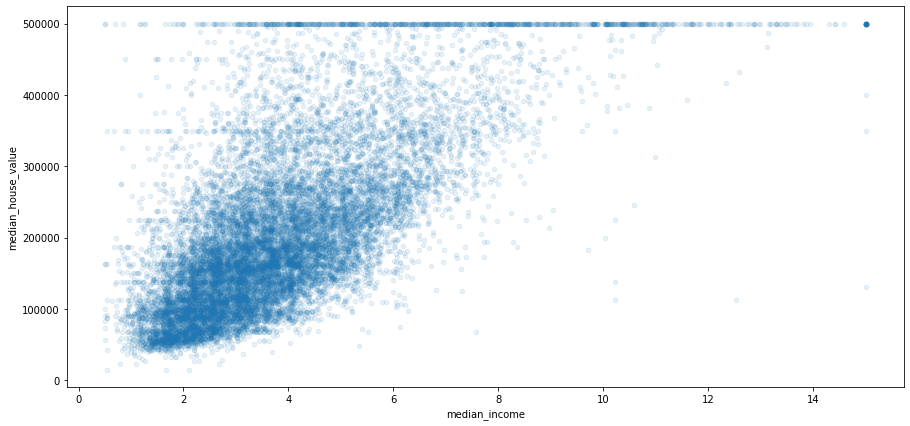

In [ ]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1, figsize = (15, 7))

In [ ]:
# trying out different attribute combination

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [ ]:
# creating a fresh training copy

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
# # Data cleaning

# # droping entries with missing total bedrooms

# housing.dropna(subset = ['total_bedrooms'])

# housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
# housing.drop("total_bedrooms", axis=1)

# housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
# # replacing empty values with median

# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median)

# housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
# using sklearn to replace missing value with median

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
X = imputer.transform(housing_num)

# # converting data back to a pandas dataframe
# housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [ ]:
# converting ocean proximity to numerical data

from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [ ]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [ ]:
# applying one-hot key encoding

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot


array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])